### Simulated

In [62]:
from scipy.ndimage.filters import gaussian_filter

In [207]:
NC = 10
CS = 50
CW = 0.05
pixel = 15
sigma = 2
norm = 300

In [212]:
# generate firm locations
c_cent = 0.5 + 0.25*np.random.randn(NC, 2)
c_size = np.random.poisson(CS, size=NC)
f_locs = np.vstack([cc+CW*np.random.randn(cs, 2) for cc, cs in zip(c_cent, c_size)])
df_locs = pd.DataFrame({'lon': f_locs[:,0], 'lat': f_locs[:,1]})
df_locs = df_locs[(df_locs['lon']>0)&(df_locs['lon']<1)&(df_locs['lat']>0)&(df_locs['lat']<1)]
len(df_locs)

460

In [213]:
# compute density
im_range = (0, 1)
count, lon_bins, lat_bins = np.histogram2d(df_locs['lon'], df_locs['lat'], bins=size, range=((0, 1), (0, 1)))
dens = count/(pixel/1e3)**2 # firms per square kilometer
dens = gaussian_filter(dens, sigma=sigma)
dens = dens/(dens+norm)

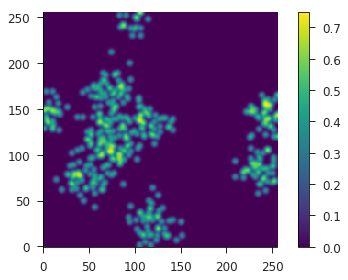

In [214]:
plt.imshow(dens.T, origin='lower');
plt.colorbar();

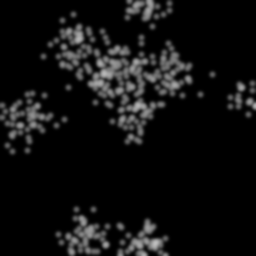

In [215]:
PIL.Image.fromarray((255*dens).astype(np.uint8))